## HW02 – Clustering Homes in Ames, IA

### By Donovan Manogue

## Section 3 Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# In this section I made sure to import all the libraries we need intially. Later I might need to add more libraries and will do so when needed.

## Section 4 Import Data From URL (From the File)

In [7]:
df_realestate = pd.read_csv('Homework2_Data/Data6310_HW02.csv',index_col=0,header=0)
df_school = pd.read_csv('Homework2_Data/Ames_School_Summary.csv', index_col= None, header=0)
df_neigh_school =pd.read_csv('Homework2_Data/Neighbor_School.csv', index_col=None, header=0)

In [8]:
# Since we aren't using URLs to import the data, I used the standard pandas read function for csv files.

## Section 5 Create Data Frame 

### Section 5a: Create df_school_assess

In [11]:
dummies_School_Name = pd.get_dummies(df_school['School_Name'],prefix='sch_', drop_first = False)

In [12]:
dummies_School_Name = dummies_School_Name.astype('int64')

In [13]:
dummies_School_Name

,sch__Edwards,sch__Fellows,sch__Gilbert,sch__Meeker,sch__Mitchell,sch__Sawyer
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
5,0,0,1,0,0,0


In [14]:
df_school= pd.concat([df_school,dummies_School_Name],axis=1)

In [15]:
df_school

,Reporting_Year,School_Code,School_Name,District_Code,District_Name,AEA_Name,Grade_Range,School_Type,School_Index,School_Rating_Category,...,Index_Hispanic,Index_Multi,Index_NatAm,Index_White,sch__Edwards,sch__Fellows,sch__Gilbert,sch__Meeker,sch__Mitchell,sch__Sawyer
0,2018-2019,2250427,Edwards,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,45.23,Needs Improvement,...,NaN,NaN,NaN,48.05,1,0,0,0,0,0
1,2018-2019,2250440,Fellows,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,59.55,Commendable,...,NaN,NaN,NaN,53.98,0,1,0,0,0,0
2,2018-2019,2250454,Meeker,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,50.09,Acceptable,...,NaN,NaN,NaN,50.37,0,0,0,1,0,0
3,2018-2019,2250456,Mitchell,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,48.60,Needs Improvement,...,NaN,NaN,NaN,50.78,0,0,0,0,1,0
4,2018-2019,2250481,Sawyer,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,42.47,Priority,...,NaN,NaN,NaN,44.44,0,0,0,0,0,1
5,2018-2019,24660418,Gilbert,2466,Gilbert CSD,Heartland AEA,"(03, 04, 05)",Elementary,59.46,Commendable,...,NaN,NaN,NaN,58.60,0,0,1,0,0,0


In [16]:
# In this portion of the code I am adding dummy variables to the code for the school name, as they are nominal variables

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder = LabelEncoder()

df_school['Comprehensive_Decision'] = label_encoder.fit_transform(df_school['Comprehensive_Decision'])


In [19]:
pd.set_option('display.max_columns', None)

df_school


,Reporting_Year,School_Code,School_Name,District_Code,District_Name,AEA_Name,Grade_Range,School_Type,School_Index,School_Rating_Category,ESSA_Support_Status,Comprehensive_Decision,Targeted_Decision,Targeted_Subgroups,School_Index_Source,Address1,Address2,City,State,ZIP,Phone,Fax,Website,Email,School_Administrator_Name,School_Administrator_Title,Assessment Participation,Average School Achievement,Growth,Percent Proficient,Count_Male,Percent_Male,Count_Female,Percent_Female,Count_EL,Percent_EL,Count_FRL,Percent_FRL,Count_IEP,Percent_IEP,Count_Asian,Percent_Asian,Count_Black,Percent_Black,Count_PacIs,Percent_PacIs,Count_Hispanic,Percent_Hispanic,Count_Multi,Percent_Multi,Count_NatAm,Percent_NatAm,Count_White,Percent_White,Count_Foster_Care,Percent_Foster_Care,Count_Military_Connected,Percent_Military_Connected,Count_Migrant,Percent_Migrant,Count_Homeless,Percent_Homeless,Count_All_Students,Index_EL,Index_FRL,Index_IEP,Index_Asian,Index_Black,Index_PacIs,Index_Hispanic,Index_Multi,Index_NatAm,Index_White,sch__Edwards,sch__Fellows,sch__Gilbert,sch__Meeker,sch__Mitchell,sch__Sawyer
0,2018-2019,2250427,Edwards,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,45.23,Needs Improvement,Targeted Year 1,0,Targeted,"Low Socio-Economic Status (FRL), Students with...",NaN,820 Miller Ave,NaN,Ames,Iowa,50014,5152393760,5152393814,www.ames.k12.ia.us/Schools/Edwards/Edwards.html,kristi.mixdorf@ames.k12.ia.us,Kristi Mixdorf,Principal,99.50,49.57,31.00,64.130,179,46.9,203,53.1,32,8.4,144,37.7,57,14.9,31,8.1,47,12.3,1,0.3,33,8.6,27,7.1,0,0.0,243,63.6,2,0.5,0,0.0,0,0,14,3.7,382,NaN,39.72,28.94,NaN,NaN,NaN,NaN,NaN,NaN,48.05,1,0,0,0,0,0
1,2018-2019,2250440,Fellows,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,59.55,Commendable,Targeted Year 1,0,Targeted,Low Socio-Economic Status (FRL),NaN,1235 20th St.,NaN,Ames,Iowa,50010,5152393765,5152393837,www.ames.k12.ia.us/Schools/Fellows/Fellows.html,brandon.schrauth@ames.k12.ia.us,Lana LaSalle,Principal,99.66,56.68,52.75,83.805,305,51.0,293,49.0,63,10.5,128,21.4,70,11.7,126,21.1,31,5.2,0,0.0,41,6.9,39,6.5,0,0.0,361,60.4,0,0.0,0,0.0,0,0,3,0.5,598,NaN,41.06,NaN,72.24,NaN,NaN,NaN,NaN,NaN,53.98,0,1,0,0,0,0
2,2018-2019,2250454,Meeker,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,50.09,Acceptable,Targeted Year 1,0,Targeted,Students with Disabilities (IEP),NaN,300 20th Street,NaN,Ames,Iowa,50010,5152393770,5152393812,www.ames.k12.ia.us/Schools/Meeker/Meeker.html,steve.flynn@ames.k12.ia.us,Steve Flynn,Principal,100.00,50.16,38.50,71.105,233,50.5,228,49.5,47,10.2,184,39.9,51,11.1,30,6.5,30,6.5,0,0.0,40,8.7,34,7.4,1,0.2,326,70.7,0,0.0,0,0.0,0,0,11,2.4,461,NaN,47.49,31.43,NaN,NaN,NaN,NaN,NaN,NaN,50.37,0,0,0,1,0,0
3,2018-2019,2250456,Mitchell,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,48.60,Needs Improvement,No Support Required,0,Met,NaN,NaN,3521 Jewel Dr,NaN,Ames,Iowa,50010,5152393775,5152393823,www.ames.k12.ia.us/Schools/Mitchell/Mitchell.html,justin.jeffs@ames.k12.ia.us,Justin Jeffs,Principal,100.00,50.47,36.50,71.370,160,50.5,157,49.5,23,7.3,151,47.6,43,13.6,10,3.2,33,10.4,1,0.3,42,13.2,17,5.4,0,0.0,214,67.5,2,0.6,0,0.0,0,0,13,4.1,317,NaN,44.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.78,0,0,0,0,1,0
4,2018-2019,2250481,Sawyer,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,42.47,Priority,Targeted Year 1,1,Targeted,Low Socio-Economic Status (FRL),NaN,4316 Ontario St,NaN,Ames,Iowa,50010,5152393790,5152393815,www.ames.k12.ia.us/Schools/Sawyer/Sawyer.html,sue.lawler@ames.k12.ia.us,Sue Lawler,Principal,100.00,49.20,26.25,63.770,184,51.1,176,48.9,37,10.3,116,32.2,51,14.2,27,7.5,35,9.7,0,0.0,39,10.8,26,7.2,0,0.0,233,64.7,9,2.5,0,0.0,0,0,4,1.1,360,NaN,32.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,0,0,0,0,0,1
5,2018-2019,24660418,Gilbert,2466,Gilbert CSD,Heartland AEA,"(03, 04, 05)",Elementary,59.46,Commendable,No Support Required,0,Met,NaN,NaN,103 Mathews Dr,NaN,Gilbert,Iowa,50105,5152323748,8553131520,www.gilbertcsd.org,griffina@gilbert.k12.ia.us,Amy

In [20]:
df_school['Targeted_Decision'] = label_encoder.fit_transform(df_school['Targeted_Decision'])

In [21]:
df_school['Targeted_Decision']

0    1
1    1
2    1
3    0
4    1
5    0
Name: Targeted_Decision, dtype: int64

In [22]:
# In this portion of the code I am adding dummy variables to the code for the school name, but I am using the label encoder

In [23]:
df_school_assess = pd.merge(df_neigh_school,df_school, how='right', on='School_Name')

In [24]:
df_school_assess

,Neighborhood,School_Name,Reporting_Year,School_Code,District_Code,District_Name,AEA_Name,Grade_Range,School_Type,School_Index,School_Rating_Category,ESSA_Support_Status,Comprehensive_Decision,Targeted_Decision,Targeted_Subgroups,School_Index_Source,Address1,Address2,City,State,ZIP,Phone,Fax,Website,Email,School_Administrator_Name,School_Administrator_Title,Assessment Participation,Average School Achievement,Growth,Percent Proficient,Count_Male,Percent_Male,Count_Female,Percent_Female,Count_EL,Percent_EL,Count_FRL,Percent_FRL,Count_IEP,Percent_IEP,Count_Asian,Percent_Asian,Count_Black,Percent_Black,Count_PacIs,Percent_PacIs,Count_Hispanic,Percent_Hispanic,Count_Multi,Percent_Multi,Count_NatAm,Percent_NatAm,Count_White,Percent_White,Count_Foster_Care,Percent_Foster_Care,Count_Military_Connected,Percent_Military_Connected,Count_Migrant,Percent_Migrant,Count_Homeless,Percent_Homeless,Count_All_Students,Index_EL,Index_FRL,Index_IEP,Index_Asian,Index_Black,Index_PacIs,Index_Hispanic,Index_Multi,Index_NatAm,Index_White,sch__Edwards,sch__Fellows,sch__Gilbert,sch__Meeker,sch__Mitchell,sch__Sawyer
0,Bluestem,Edwards,2018-2019,2250427,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,45.23,Needs Improvement,Targeted Year 1,0,1,"Low Socio-Economic Status (FRL), Students with...",NaN,820 Miller Ave,NaN,Ames,Iowa,50014,5152393760,5152393814,www.ames.k12.ia.us/Schools/Edwards/Edwards.html,kristi.mixdorf@ames.k12.ia.us,Kristi Mixdorf,Principal,99.50,49.57,31.00,64.130,179,46.9,203,53.1,32,8.4,144,37.7,57,14.9,31,8.1,47,12.3,1,0.3,33,8.6,27,7.1,0,0.0,243,63.6,2,0.5,0,0.0,0,0,14,3.7,382,NaN,39.72,28.94,NaN,NaN,NaN,NaN,NaN,NaN,48.05,1,0,0,0,0,0
1,College Creek,Edwards,2018-2019,2250427,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,45.23,Needs Improvement,Targeted Year 1,0,1,"Low Socio-Economic Status (FRL), Students with...",NaN,820 Miller Ave,NaN,Ames,Iowa,50014,5152393760,5152393814,www.ames.k12.ia.us/Schools/Edwards/Edwards.html,kristi.mixdorf@ames.k12.ia.us,Kristi Mixdorf,Principal,99.50,49.57,31.00,64.130,179,46.9,203,53.1,32,8.4,144,37.7,57,14.9,31,8.1,47,12.3,1,0.3,33,8.6,27,7.1,0,0.0,243,63.6,2,0.5,0,0.0,0,0,14,3.7,382,NaN,39.72,28.94,NaN,NaN,NaN,NaN,NaN,NaN,48.05,1,0,0,0,0,0
2,Crawford,Edwards,2018-2019,2250427,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,45.23,Needs Improvement,Targeted Year 1,0,1,"Low Socio-Economic Status (FRL), Students with...",NaN,820 Miller Ave,NaN,Ames,Iowa,50014,5152393760,5152393814,www.ames.k12.ia.us/Schools/Edwards/Edwards.html,kristi.mixdorf@ames.k12.ia.us,Kristi Mixdorf,Principal,99.50,49.57,31.00,64.130,179,46.9,203,53.1,32,8.4,144,37.7,57,14.9,31,8.1,47,12.3,1,0.3,33,8.6,27,7.1,0,0.0,243,63.6,2,0.5,0,0.0,0,0,14,3.7,382,NaN,39.72,28.94,NaN,NaN,NaN,NaN,NaN,NaN,48.05,1,0,0,0,0,0
3,Edwards,Edwards,2018-2019,2250427,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,45.23,Needs Improvement,Targeted Year 1,0,1,"Low Socio-Economic Status (FRL), Students with...",NaN,820 Miller Ave,NaN,Ames,Iowa,50014,5152393760,5152393814,www.ames.k12.ia.us/Schools/Edwards/Edwards.html,kristi.mixdorf@ames.k12.ia.us,Kristi Mixdorf,Principal,99.50,49.57,31.00,64.130,179,46.9,203,53.1,32,8.4,144,37.7,57,14.9,31,8.1,47,12.3,1,0.3,33,8.6,27,7.1,0,0.0,243,63.6,2,0.5,0,0.0,0,0,14,3.7,382,NaN,39.72,28.94,NaN,NaN,NaN,NaN,NaN,NaN,48.05,1,0,0,0,0,0
4,South & West of Iowa State,Edwards,2018-2019,2250427,225,Ames CSD,Heartland AEA,"(KG, 01, 02, 03, 04, 05)",Elementary,45.23,Needs Improvement,Targeted Year 1,0,1,"Low Socio-Economic Status (FRL), Students with...",NaN,820 Miller Ave,NaN,Ames,Iowa,50014,5152393760,5152393814,www.ames.k12.ia.us/Schools/Edwards/Edwards.html,kristi.mixdorf@ames.k12.ia.us,Kristi Mixdorf,Principal,99.50,49.57,31.00,64.130,179,46.9,203,53.1,32,8.4,144,37.7,57,14.9,31,8.1,47,12.3,1,0.3,33,8.6,27,7.1,0,0.0,243,63.6,2,0.5,0,0.0,0,0,14,3.7,382,NaN,39.72,28.94,NaN,NaN,NaN,NaN,NaN,NaN,48.05,1,0,0,0,0,0
5,Briardale,Fellows,2018-2019,2250440,225,Ames CSD,H

In [25]:
df_school_assess.columns

Index(['Neighborhood', 'School_Name', 'Reporting_Year', 'School_Code',
       'District_Code', 'District_Name', 'AEA_Name', 'Grade_Range',
       'School_Type', 'School_Index', 'School_Rating_Category',
       'ESSA_Support_Status', 'Comprehensive_Decision', 'Targeted_Decision',
       'Targeted_Subgroups', 'School_Index_Source', 'Address1', 'Address2',
       'City', 'State', 'ZIP', 'Phone', 'Fax', 'Website', 'Email',
       'School_Administrator_Name', 'School_Administrator_Title',
       'Assessment Participation', 'Average School Achievement', 'Growth',
       'Percent Proficient', 'Count_Male', 'Percent_Male', 'Count_Female',
       'Percent_Female', 'Count_EL', 'Percent_EL', 'Count_FRL', 'Percent_FRL',
       'Count_IEP', 'Percent_IEP', 'Count_Asian', 'Percent_Asian',
       'Count_Black', 'Percent_Black', 'Count_PacIs', 'Percent_PacIs',
       'Count_Hispanic', 'Percent_Hispanic', 'Count_Multi', 'Percent_Multi',
       'Count_NatAm', 'Percent_NatAm', 'Count_White', 'Percent_Whit

In [2]:
df_school_assess.info()

NameError: name 'df_school_assess' is not defined

In [27]:
df_school_assess = df_school_assess[
    ['Neighborhood', 'School_Name', 'School_Index', 'Comprehensive_Decision', 
     'Targeted_Decision', 'Growth', 'Percent Proficient', 'Percent_Male', 
     'Percent_Female', 'Percent_EL', 'Percent_FRL', 'Percent_IEP', 
     'Percent_Asian', 'Percent_Black', 'Percent_PacIs', 'Percent_Hispanic', 
     'Percent_Multi', 'Percent_NatAm', 'Percent_White', 'Percent_Foster_Care', 
     'Percent_Military_Connected', 'Percent_Migrant', 'Percent_Homeless','sch__Edwards', 'sch__Fellows', 'sch__Gilbert', 'sch__Meeker',
       'sch__Mitchell', 'sch__Sawyer']
]


In [28]:
df_school_assess.head()

,Neighborhood,School_Name,School_Index,Comprehensive_Decision,Targeted_Decision,Growth,Percent Proficient,Percent_Male,Percent_Female,Percent_EL,Percent_FRL,Percent_IEP,Percent_Asian,Percent_Black,Percent_PacIs,Percent_Hispanic,Percent_Multi,Percent_NatAm,Percent_White,Percent_Foster_Care,Percent_Military_Connected,Percent_Migrant,Percent_Homeless,sch__Edwards,sch__Fellows,sch__Gilbert,sch__Meeker,sch__Mitchell,sch__Sawyer
0,Bluestem,Edwards,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
1,College Creek,Edwards,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
2,Crawford,Edwards,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
3,Edwards,Edwards,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
4,South & West of Iowa State,Edwards,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0


In [29]:
# In this section I had to change the features to better fit the dataframe for the clustering. I went ahead and had to drop a few columnn,
# as well as creating a few dummy variables and label encoding the variables that were not nominal

### Section 5b: Create df_re

In [31]:
df_realestate

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Total Area,Bedrooms Above Grade,Kitchen Qual,Total Rooms Above Grade,Fireplaces,Garage Finish,Garage Cars,Sale Condition,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Bathrooms,Pool,Extra Kitchens,Baths per Bedroom,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,lc_Banked,lc_Depression,lc_Hillside,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,nh_Meadow Village,nh_Mitchell,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished,Kitchen Quality Num
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,65,8450,Level,College Creek,Normal,7,5,2003,196,706,150,856,854,1710,3,Good,8,0,Rough Finished,2,Normal Sale,208500,61,3,1,3.5,0,0,1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
2,1-STORY 1946 & NEWER,80,9600,Level,Veenker,Adjacent Feeder St,6,8,1976,0,978,284,1262,0,1262,3,Average,6,1,Rough Finished,2,Normal Sale,181500,298,2,1,2.5,0,0,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2
3,2-STORY 1946 & NEWER,68,11250,Level,College Creek,Normal,7,5,2001,162,486,434,920,866,1786,3,Good,6,1,Rough Finished,2,Normal Sale,223500,42,3,1,3.5,0,0,1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
4,2-STORY 1945 & OLDER,60,9550,Level,Crawford,Normal,7,5,1915,0,216,540,961,756,1717,3,Good,7,1,Unfinished,3,"Abnormal Sale - trade, foreclosure, short sale",140000,307,2,0,2.0,0,0,0.666667,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3
5,2-STORY 1946 & NEWER,84,14260,Level,Northridge,Normal,8,5,2000,350,655,490,1145,1053,2198,4,Good,9,1,Rough Finished,3,Normal Sale,250000,276,3,1,3.5,0,0,0.750000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2-STORY 1946 & NEWER,62,7917,Level,Gilbert,Normal,6,5,1999,0,0,953,953,694,1647,3,Average,7,1,Rough Finished,2,Normal Sale,175000,40,2,1,2.5,0,0,0.666667,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
1457,1-STORY 1946 & NEWER,85,13175,Level,Northwest Ames,Normal,6,6,1978,119,790,589,2073,0,2073,3,Average,7,2,Unfinished,2,Normal Sale,210000,349,3,0,3.0,0,0,1.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
1458,2-STORY 1945 & OLDER,66,9042,Level,Crawford,Normal,7,9,1941,0,275,877,1188,1152,2340,4,Good,9,2,Rough Finished,1,Normal Sale,266500,60,2,0,2.0,0,0,0.500000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3


In [32]:
df_re = pd.merge(df_realestate,df_school_assess, how='right', on='Neighborhood')

In [33]:
df_re

,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Total Area,Bedrooms Above Grade,Kitchen Qual,Total Rooms Above Grade,Fireplaces,Garage Finish,Garage Cars,Sale Condition,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Bathrooms,Pool,Extra Kitchens,Baths per Bedroom,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,lc_Banked,lc_Depression,lc_Hillside,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,nh_Meadow Village,nh_Mitchell,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished,Kitchen Quality Num,School_Name,School_Index,Comprehensive_Decision,Targeted_Decision,Growth,Percent Proficient,Percent_Male,Percent_Female,Percent_EL,Percent_FRL,Percent_IEP,Percent_Asian,Percent_Black,Percent_PacIs,Percent_Hispanic,Percent_Multi,Percent_NatAm,Percent_White,Percent_Foster_Care,Percent_Military_Connected,Percent_Migrant,Percent_Homeless,sch__Edwards,sch__Fellows,sch__Gilbert,sch__Meeker,sch__Mitchell,sch__Sawyer
0,2-STORY PUD,24,1950,Level,Bluestem,Normal,6,6,1980,0,81,23,716,840,1556,3,Average,6,1,Finished,2,Normal Sale,151000,161,3,1,3.5,0,0,1.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,Edwards,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
1,2-STORY PUD,24,1300,Level,Bluestem,Normal,6,6,1980,0,285,276,561,668,1229,2,Average,5,1,Finished,2,Normal Sale,124000,150,1,1,1.5,0,0,0.500000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,Edwards,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
2,2-STORY 1946 & NEWER,65,8450,Level,College Creek,Normal,7,5,2003,196,706,150,856,854,1710,3,Good,8,0,Rough Finished,2,Normal Sale,208500,61,3,1,3.5,0,0,1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,Edwards,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
3,2-STORY 1946 & NEWER,68,11250,Level,College Creek,Normal,7,5,2001,162,486,434,920,866,1786,3,Good,6,1,Rough Finished,2,Normal Sale,223500,42,3,1,3.5,0,0,1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,Edwards,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
4,1-STORY 1946 & NEWER,91,10652,Level,College Creek,Normal,7,5,2006,306,0,1494,1494,0,1494,3,Good,7,1,Rough Finished,3,Home was not completed when last assessed (ass...,279500,193,2,0,2.0,0,0,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,3,Edwards,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [34]:
df_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Columns: 110 entries, Dwelling Type to sch__Sawyer
dtypes: float64(20), int64(82), object(8)
memory usage: 1.2+ MB


In [35]:
null_counts = df_re.isnull().sum()

In [36]:
print(null_counts.sum())

0


In [37]:
#Created the new df_re which is a merge of all our data from the first section of this class with the new data. 
# I made sure to do a right join so all the data from our right table was added where we needed.
# In this section I had to check to see if we had the correct amount of features rows and making sure there were no null values.
# for some reason .info() wasn't working for me so I went ahead and made a variable called null_counts and counted the nulls which were 0.

### Section 5c: Create df_re_cluster 

In [39]:
df_re_cluster = df_re.select_dtypes(exclude =['object'])

In [40]:
df_re_cluster

,Lot Frontage,Lot Area,Overall Quality,Overall Cond,Year Built,Masonry/Veneer Area,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Total Area,Bedrooms Above Grade,Total Rooms Above Grade,Fireplaces,Garage Cars,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Bathrooms,Pool,Extra Kitchens,Baths per Bedroom,dt_1-1/2 STORY ALL AGES,dt_1-STORY 1945 & OLDER,dt_1-STORY PUD,dt_2 FAMILY CONVERSION,dt_2-1/2 STORY ALL AGES,dt_2-STORY 1945 & OLDER,dt_2-STORY 1946 & NEWER,dt_2-STORY PUD,dt_DUPLEX,dt_SPLIT FOYER,dt_SPLIT OR MULTI-LEVEL,lc_Banked,lc_Depression,lc_Hillside,nh_Bloomington Heights,nh_Bluestem,nh_Briardale,nh_Brookside,nh_Clear Creek,nh_College Creek,nh_Crawford,nh_Edwards,nh_Gilbert,nh_Iowa DOT and Rail Road,nh_Meadow Village,nh_Mitchell,nh_Northpark Villa,nh_Northridge,nh_Northridge Heights,nh_Northwest Ames,nh_Old Town,nh_Sawyer,nh_Sawyer West,nh_Somerset,nh_South & West of Iowa State,nh_Stone Brook,nh_Timberland,nh_Veenker,locc_Adjacent Arterial St,locc_Adjacent Feeder St,locc_Adjacent Pos Feature,locc_Adjacent Railroad,locc_Near Pos Feature,locc_Near Railroad,sc_Abnormal Sale,sc_Allocation,sc_Home not complete,sc_Sale within Family,gf_Finished,gf_Rough Finished,gf_Unfinished,Kitchen Quality Num,School_Index,Comprehensive_Decision,Targeted_Decision,Growth,Percent Proficient,Percent_Male,Percent_Female,Percent_EL,Percent_FRL,Percent_IEP,Percent_Asian,Percent_Black,Percent_PacIs,Percent_Hispanic,Percent_Multi,Percent_NatAm,Percent_White,Percent_Foster_Care,Percent_Military_Connected,Percent_Migrant,Percent_Homeless,sch__Edwards,sch__Fellows,sch__Gilbert,sch__Meeker,sch__Mitchell,sch__Sawyer
0,24,1950,6,6,1980,0,81,23,716,840,1556,3,6,1,2,151000,161,3,1,3.5,0,0,1.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
1,24,1300,6,6,1980,0,285,276,561,668,1229,2,5,1,2,124000,150,1,1,1.5,0,0,0.500000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
2,65,8450,7,5,2003,196,706,150,856,854,1710,3,8,0,2,208500,61,3,1,3.5,0,0,1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
3,68,11250,7,5,2001,162,486,434,920,866,1786,3,6,1,2,223500,42,3,1,3.5,0,0,1.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
4,91,10652,7,5,2006,306,0,1494,1494,0,1494,3,7,1,3,279500,193,2,0,2.0,0,0,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,3,45.23,0,1,31.0,64.13,46.9,53.1,8.4,37.7,14.9,8.1,12.3,0.3,8.6,7.1,0.0,63.6,0.5,0.0,0,3.7,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0,5814,8,5,1984,0,1036,184,1360,0,1360,1,4,1,2,187500,63,2,0,2.0,0,0,2.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,3,59.46,0,0,51.5,90.01,51.6,48.4,0.9,9.2,12.1,2.9,1.7,0.0,4.6,2.9,0.3,87.6,0.0,0.3,0,0.9,0,0,1,0,0,0
1383,41,4920,8,5,2001,0,616,722,1338,0,1338,2,6,0,2,213500,170,3,0,3.0,0,0,1.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,59.46,0,0,51.5,90.01,51.6

In [41]:
# In this section I made sure to exlude any data type that was an object, and keeping every other type and turned the result
# into another dataframe.

## 6. K-Means Clustering

### Section 6a: Create Inertia model and Silhouette Chart

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done


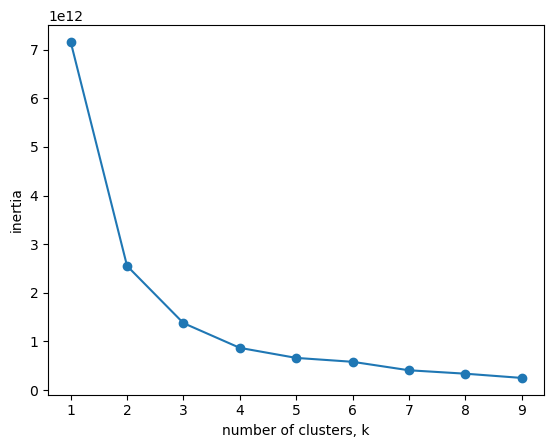

In [44]:
from sklearn.cluster import KMeans

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_re_cluster)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    print("iteration {} done".format(k))
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [45]:
# Created an Inertia Model

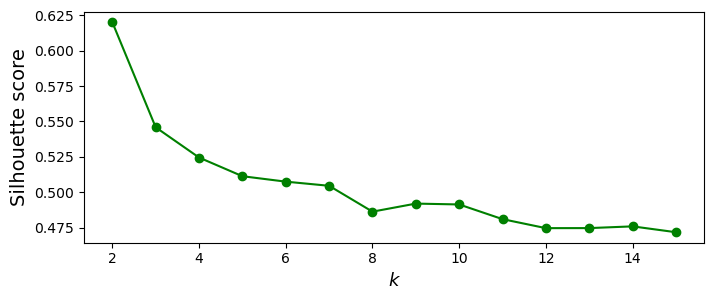

In [46]:
from sklearn.metrics import silhouette_score, silhouette_samples, confusion_matrix, classification_report, roc_curve
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_re_cluster) for k in range(1, 16)]

silhouette_scores = [silhouette_score(df_re_cluster, model_demo.labels_) for model_demo in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 16), silhouette_scores, "go-")
plt.xlabel("$k$", fontsize=13)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [47]:
# Created a Silhouette Model

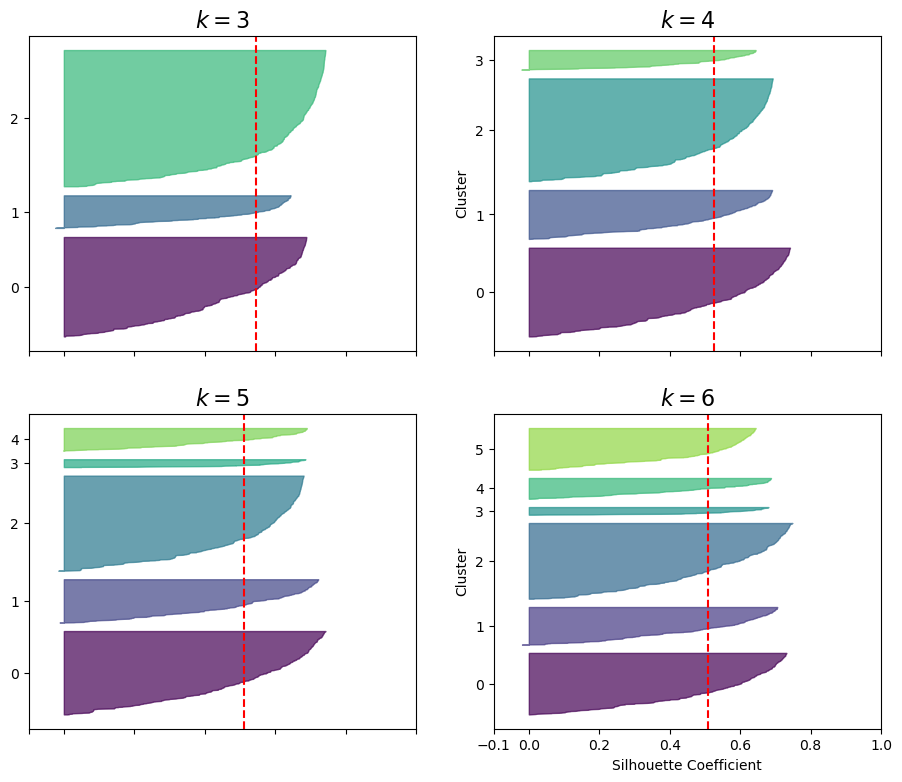

In [48]:
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df_re_cluster, y_pred)

    padding = len(df_re_cluster) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.viridis(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                           facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    if k in (4, 6):
        plt.ylabel("Cluster")
    
    if k in (6, 7):
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

In [49]:
#Created a Silhouette Chart

In [50]:
# In this section I created 3 models (intertia, silhouette model, and silhouette chart) for df_re_cluster

### Section 6b: Create K-Means Clusters

In [52]:
re_predict_k1 = KMeans(n_clusters=4)
re_predict_k1.fit(df_re_cluster)
ap_predict_k_1 = re_predict_k1.predict(df_re_cluster)
ap_predict_k_1 = pd.DataFrame(ap_predict_k_1)
ap_predict_k_1 = ap_predict_k_1.rename(columns = {0:'Predict_k1'})
display(ap_predict_k_1.head())
ap_predict_k_1['Predict_k1'].value_counts()

,Predict_k1
0,0
1,1
2,0
3,2
4,2


Predict_k1
1    548
0    473
2    261
3    105
Name: count, dtype: int64

In [53]:
re_predict_k2 = KMeans(n_clusters=3)
re_predict_k2.fit(df_re_cluster)
ap_predict_k_2 = re_predict_k2.predict(df_re_cluster)
ap_predict_k_2 = pd.DataFrame(ap_predict_k_2)
ap_predict_k_2 = ap_predict_k_2.rename(columns = {0:'Predict_k2'})
display(ap_predict_k_2.head())
ap_predict_k_2['Predict_k2'].value_counts()

,Predict_k2
0,0
1,0
2,2
3,2
4,1


Predict_k2
0    704
2    514
1    169
Name: count, dtype: int64

In [54]:
re_predict_k3 = KMeans(n_clusters=5)
re_predict_k3.fit(df_re_cluster)
ap_predict_k_3 = re_predict_k3.predict(df_re_cluster)
ap_predict_k_3 = pd.DataFrame(ap_predict_k_3)
ap_predict_k_3 = ap_predict_k_3.rename(columns = {0:'Predict_k3'})
display(ap_predict_k_3.head())
ap_predict_k_3['Predict_k3'].value_counts()

,Predict_k3
0,0
1,2
2,3
3,3
4,1


Predict_k3
0    489
2    415
3    285
1    149
4     49
Name: count, dtype: int64

In [55]:
#in this section I created clsuters based on ou interia and silhouette analysises, I ended up doing 3 which is more than the hw asked for
# I did this to see the big difference between 3-5, I know we wouldn't want to use 5 clusters

### Section 6c: Explanation of Section 6

#### The two clusters that I chose were 3 clusters and 4 clusters. I also did 3 predictions just to see what it would look like. When indicating which clusters to use I looked at the interia model and was using the elbow method. This is where I look for the elbow or as some call it the knee where the clsusters interia begins to decrease at a much slower rate. When looking at the Silhouette model I notice the biggest drop was from 2-4 everything after that the drop decrese slowed down so that is why I chose clusters 3 and 4. The K-Mean clustering results show that the best number of clusters should be 3 groups.

In [58]:
# Just explainging what I did in section6 and why I chose the number of groups I did

## 7. Hierarchal Clustering

### Section 7a: Create a dendrogram and hierarchal cluster analysis with method =‘complete’

In [61]:
from scipy.cluster.hierarchy import linkage, dendrogram

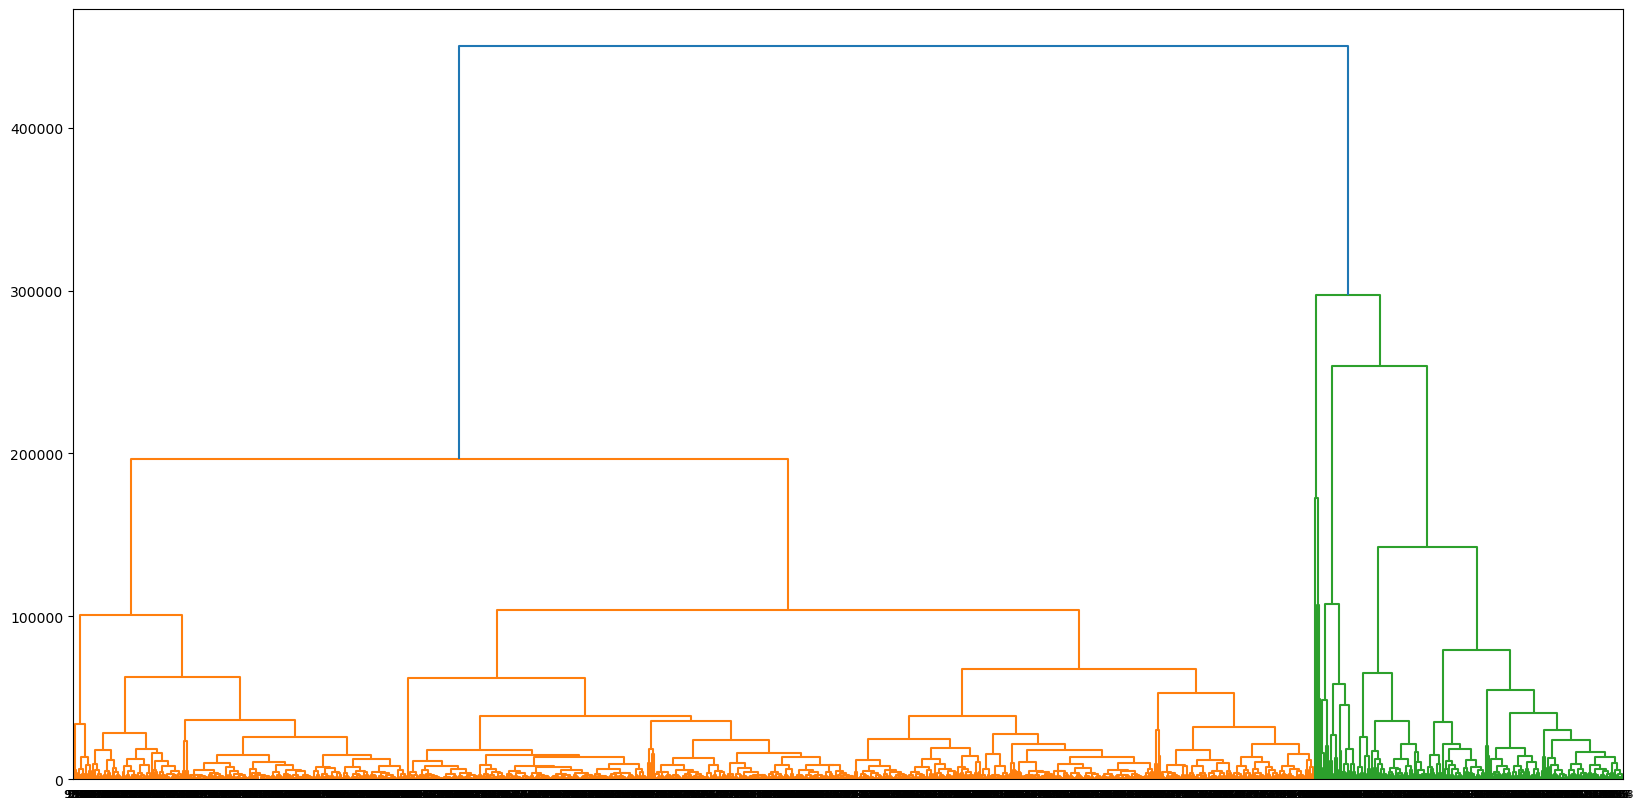

In [62]:
mergings = linkage(df_re_cluster, method='complete')
plt.figure(figsize=(20,10))
dendrogram(mergings, leaf_rotation=0, leaf_font_size=8)
plt.show()

In [63]:
from scipy.cluster.hierarchy import fcluster

In [64]:
re_predict_hc = fcluster(mergings, 125000, criterion='distance')
re_predict_hc = pd.DataFrame(re_predict_hc)
re_predict_hc.columns = ['Predict_hc']
re_predict_hc.head()

,Predict_hc
0,2
1,1
2,2
3,2
4,7


In [65]:
re_predict_hc['Predict_hc'].value_counts()

Predict_hc
2    812
1    299
7    176
6     62
5     33
3      4
4      1
Name: count, dtype: int64

### Section 7b: Create a dendrogram and hierarchal cluster analysis with method =‘ward'

In [67]:
mergings_w = linkage(df_re_cluster, method='ward')

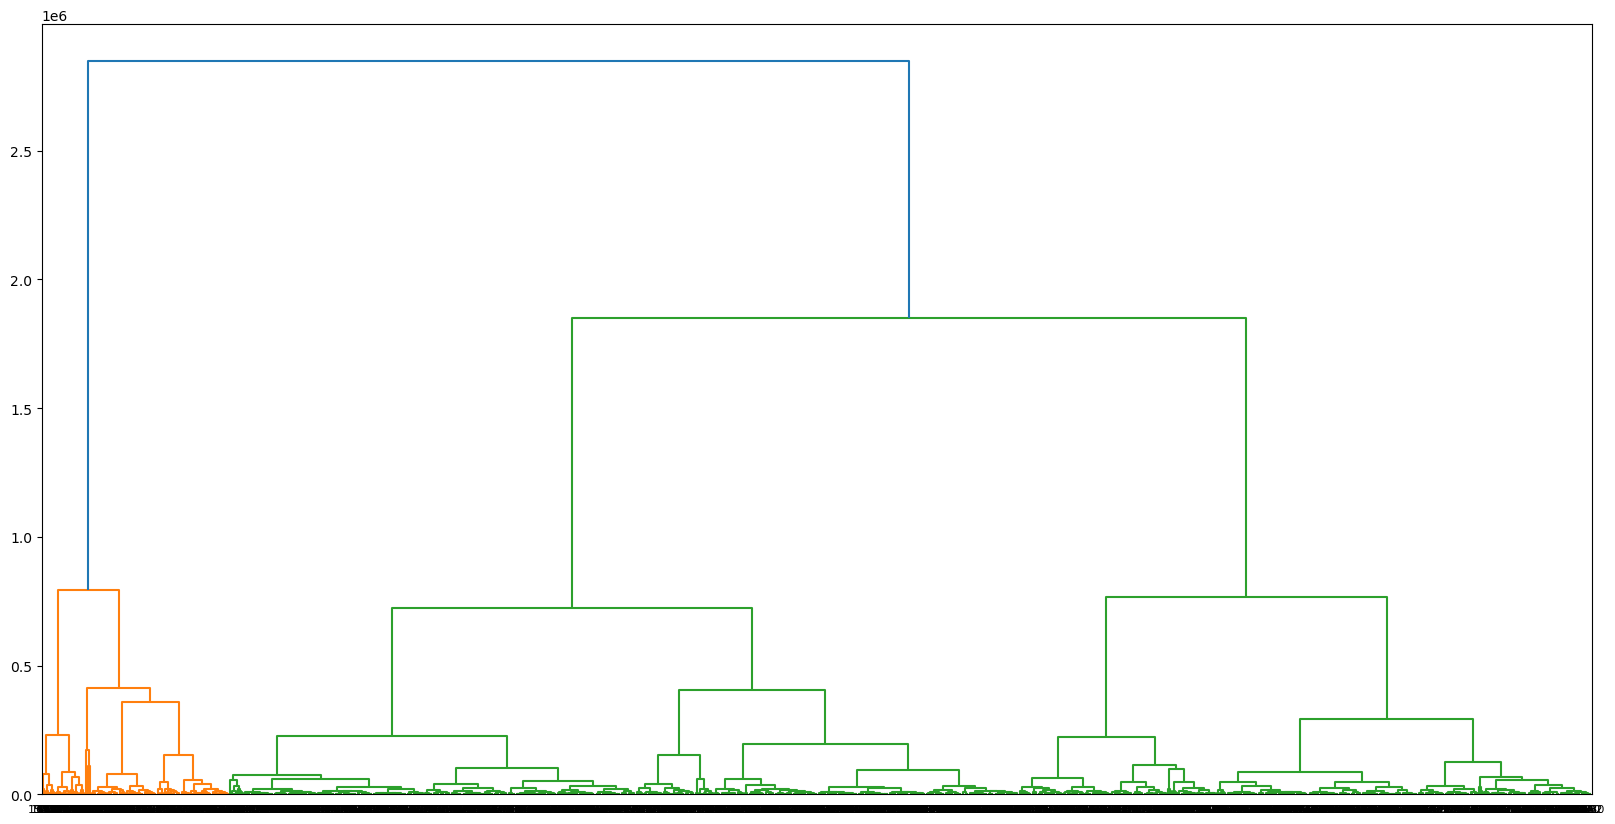

In [68]:
plt.figure(figsize=(20,10))
dendrogram(mergings_w, leaf_rotation=0, leaf_font_size=8)
plt.show()

In [69]:
re_predict_hw = fcluster(mergings_w, 500000,criterion='distance')
re_predict_hw = pd.DataFrame(re_predict_hw)
re_predict_hw.columns = ['Predict_hw']
re_predict_hw.head()

,Predict_hw
0,3
1,4
2,6
3,5
4,2


In [70]:
re_predict_hw['Predict_hw'].value_counts()

Predict_hw
3    363
4    343
6    336
5    177
2    129
1     39
Name: count, dtype: int64

In [71]:
# in this section i went ahead and did hiearchcal clustering analysis using dendograms

### Section 7c: Explanation of Section 7

### For the first hierarchal cluster I chose the cut off point of 125k, I chose this cut off based on where the groups were forming. I wanted to get the big groupsof orange on the left side of the model and grab the smaller groups that kept breaking down on the right. I thought to myself and thought there had to be a reason they kepy splitting there and wanted to capture those niche groups as well as the bigger groups.

### For the second cluster using the ward method I chose the cut off at 500k since the ward method gets rid of a lot of the variance within the clusters and wanted to get those big groups, since going lower we end up capturing more groups that I think we wouldn't need.

## 8. Compare the results of each of the different predicted clusters

## Section 8a: Create crosstabs to compare the predicted clusters between the four cluster analyses.

pd.crosstab(re_predict_hc['Predict_hc'], re_predict_hw['Predict_hw'])

In [78]:
pd.crosstab(re_predict_hw['Predict_hw'],re_predict_hc['Predict_hc'])

Predict_hc,1,2,3,4,5,6,7
Predict_hw,,,,,,,
1,0,0,0,0,33,6,0
2,0,0,4,1,0,56,68
3,2,361,0,0,0,0,0
4,297,46,0,0,0,0,0
5,0,69,0,0,0,0,108
6,0,336,0,0,0,0,0


In [79]:
pd.crosstab(ap_predict_k_3['Predict_k3'], ap_predict_k_1['Predict_k1'])

Predict_k1,0,1,2,3
Predict_k3,,,,
0,356,133,0,0
1,0,0,93,56
2,0,415,0,0
3,117,0,168,0
4,0,0,0,49


In [80]:
pd.crosstab( ap_predict_k_1['Predict_k1'],ap_predict_k_3['Predict_k3'])

Predict_k3,0,1,2,3,4
Predict_k1,,,,,
0,356,0,0,117,0
1,133,0,415,0,0
2,0,93,0,168,0
3,0,56,0,0,49


In [81]:
# Created crosstabs based on the predictions for the Hierarchal complete and ward groups and for the K-means clustering

### Section 8b: Explanation of Section 8a

#### For predict_hw and predict_hc, in the first crosstab of P_hw and P_hc, there appear to be fewer overlapping observations until reaching Cluster 2 of P_hc, which aligns well with Clusters 3, 4, 5, and 6 in P_hw. These clusters show the highest similarity in observations between the two models. Additionally, there are 27 clusters that have no observations in common across both models.

#### For k1 and k3, there is a significant alignment of observations in Cluster 0 for both models, as well as in Cluster 3 for each. These clusters share a large number of similar observations, indicating strong overlap between the two models. Overall, there appear to be several clusters in k1 and k3 with a high degree of common observations, suggesting consistency in how the models group certain data points.

In [85]:
# Created the explanation of section 8a

## 9. Comparisons using visualizations and statistics

## Section 9a: Create df_re_results

In [88]:
df_re_results_Predictions= pd.concat([ap_predict_k_1['Predict_k1'],ap_predict_k_2['Predict_k2'],re_predict_hc['Predict_hc'],re_predict_hw['Predict_hw']],axis=1)

In [89]:
df_re_results_Predictions

,Predict_k1,Predict_k2,Predict_hc,Predict_hw
0,0,0,2,3
1,1,0,1,4
2,0,2,2,6
3,2,2,2,5
4,2,1,7,2
...,...,...,...,...
1382,0,2,2,6
1383,2,2,2,6
1384,0,2,2,6
1385,2,1,7,2


In [90]:
df_re_final_concat=df_re[['Neighborhood', 'Sale Price', 'Total Area', 'Lot Area','Bedrooms Above Grade',
'Bathrooms', 'School_Name','School_Index', 'Targeted_Decision', 'Percent_FRL','Percent_White']]

In [91]:
df_re_final_concat

,Neighborhood,Sale Price,Total Area,Lot Area,Bedrooms Above Grade,Bathrooms,School_Name,School_Index,Targeted_Decision,Percent_FRL,Percent_White
0,Bluestem,151000,1556,1950,3,3.5,Edwards,45.23,1,37.7,63.6
1,Bluestem,124000,1229,1300,2,1.5,Edwards,45.23,1,37.7,63.6
2,College Creek,208500,1710,8450,3,3.5,Edwards,45.23,1,37.7,63.6
3,College Creek,223500,1786,11250,3,3.5,Edwards,45.23,1,37.7,63.6
4,College Creek,279500,1494,10652,3,2.0,Edwards,45.23,1,37.7,63.6
...,...,...,...,...,...,...,...,...,...,...,...
1382,Stone Brook,187500,1360,5814,1,2.0,Gilbert,59.46,0,9.2,87.6
1383,Stone Brook,213500,1338,4920,2,3.0,Gilbert,59.46,0,9.2,87.6
1384,Stone Brook,170000,1088,3696,2,1.5,Gilbert,59.46,0,9.2,87.6
1385,Stone Brook,278000,1659,5664,2,3.0,Gilbert,59.46,0,9.2,87.6


In [92]:
df_re_results = pd.concat([df_re_final_concat,df_re_results_Predictions],axis=1)

In [93]:
df_re_results

,Neighborhood,Sale Price,Total Area,Lot Area,Bedrooms Above Grade,Bathrooms,School_Name,School_Index,Targeted_Decision,Percent_FRL,Percent_White,Predict_k1,Predict_k2,Predict_hc,Predict_hw
0,Bluestem,151000,1556,1950,3,3.5,Edwards,45.23,1,37.7,63.6,0,0,2,3
1,Bluestem,124000,1229,1300,2,1.5,Edwards,45.23,1,37.7,63.6,1,0,1,4
2,College Creek,208500,1710,8450,3,3.5,Edwards,45.23,1,37.7,63.6,0,2,2,6
3,College Creek,223500,1786,11250,3,3.5,Edwards,45.23,1,37.7,63.6,2,2,2,5
4,College Creek,279500,1494,10652,3,2.0,Edwards,45.23,1,37.7,63.6,2,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,Stone Brook,187500,1360,5814,1,2.0,Gilbert,59.46,0,9.2,87.6,0,2,2,6
1383,Stone Brook,213500,1338,4920,2,3.0,Gilbert,59.46,0,9.2,87.6,2,2,2,6
1384,Stone Brook,170000,1088,3696,2,1.5,Gilbert,59.46,0,9.2,87.6,0,2,2,6
1385,Stone Brook,278000,1659,5664,2,3.0,Gilbert,59.46,0,9.2,87.6,2,1,7,2


In [94]:
# I this section I created a new df to hol specific variables from our predictions.

### Section 9b: Visualize df_re_results to compare the differences between clusters

/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_93208/1070071002.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Lot Area', x='Predict_k2', data=df_re_results, palette='Oranges')
/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_93208/1070071002.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Lot Area', x='Predict_k1', data=df_re_results, palette='Blues')
/var/folders/ww/gvxz55x16sj2qt6_7hv99n0w0000gn/T/ipykernel_93208/1070071002.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Lot Area', x='Predict_

(0.0, 750000.0)

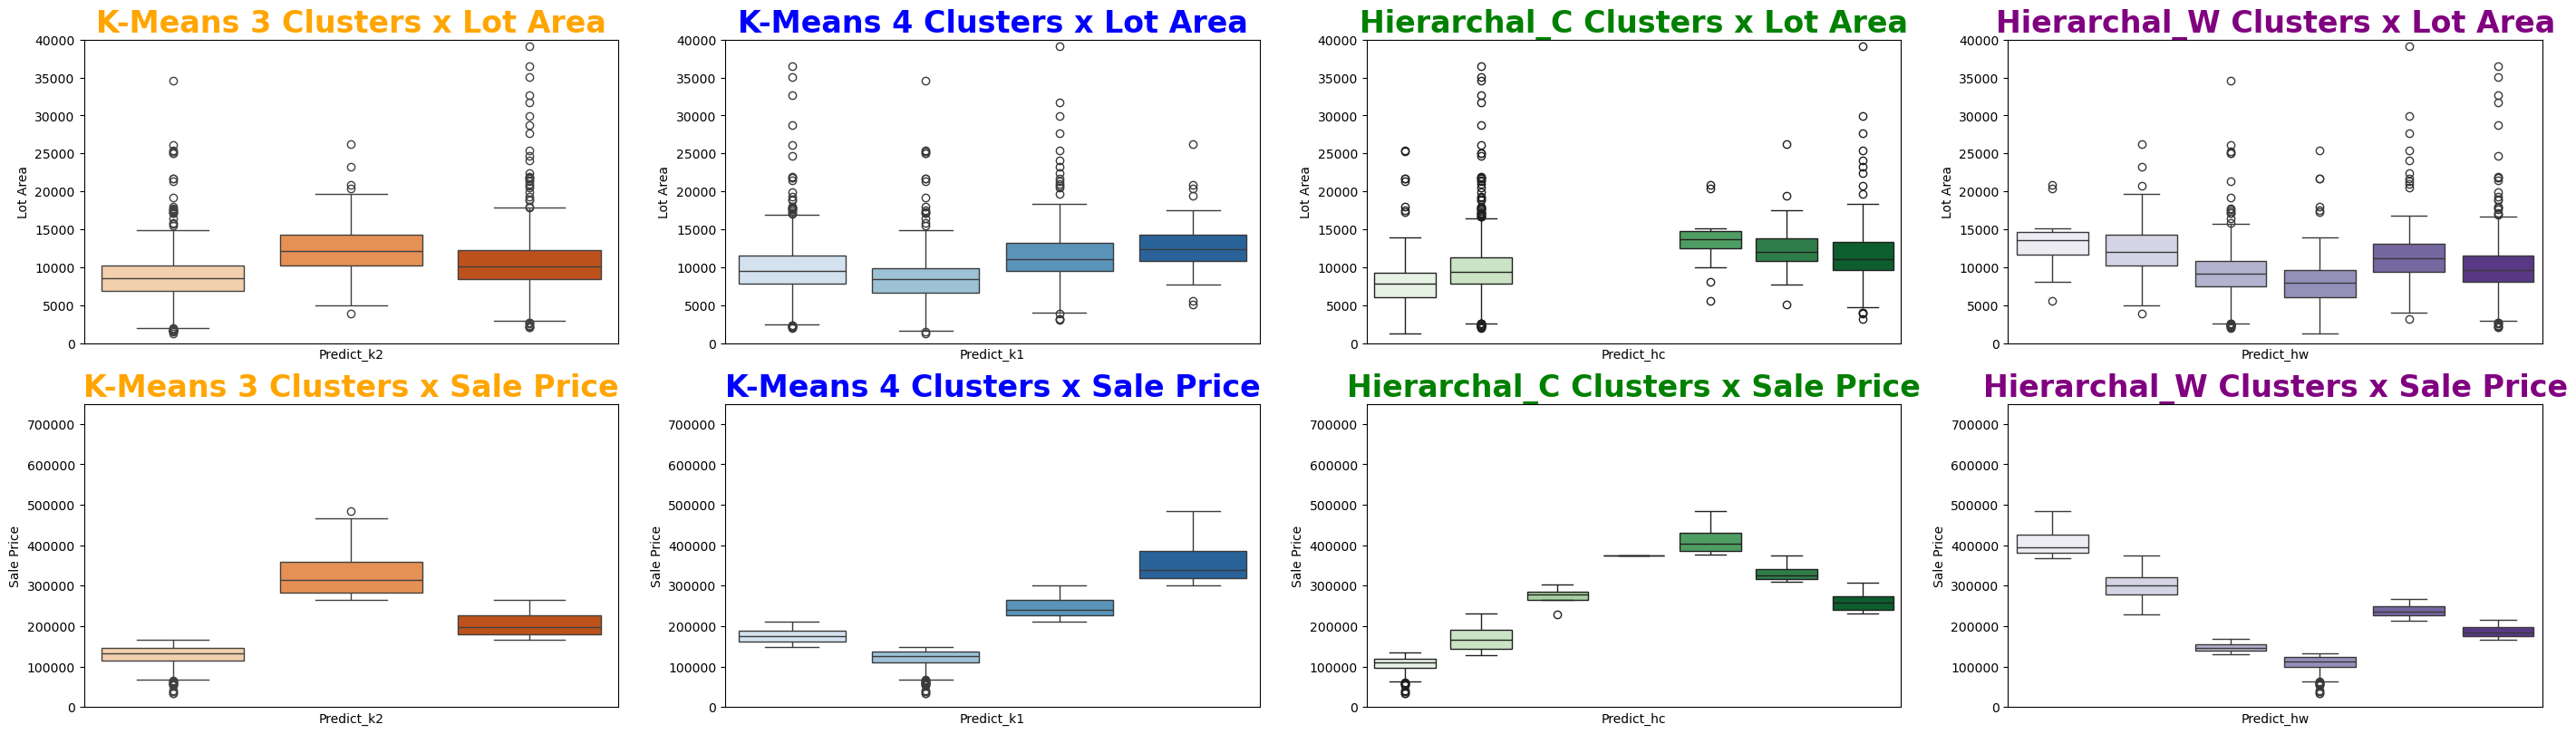

In [96]:
plt.figure(figsize=(35,20))
plt.subplot(441)
plt.title('K-Means 3 Clusters x Lot Area', fontweight='bold', color = 'orange', fontsize='24', horizontalalignment='center')
sns.boxplot(y='Lot Area', x='Predict_k2', data=df_re_results, palette='Oranges')
plt.xticks([])
plt.ylabel('Lot Area')
plt.ylim(0, 40000)
plt.subplot(442)
plt.title('K-Means 4 Clusters x Lot Area', fontweight='bold', color = 'blue', fontsize='24', horizontalalignment='center')
sns.boxplot(y='Lot Area', x='Predict_k1', data=df_re_results, palette='Blues')
plt.xticks([])
plt.ylabel('Lot Area')
plt.ylim(0, 40000)
plt.subplot(443)
plt.title('Hierarchal_C Clusters x Lot Area', fontweight='bold', color = 'green', fontsize='24', horizontalalignment='center')
sns.boxplot(y='Lot Area', x='Predict_hc', data=df_re_results, palette='Greens')
plt.xticks([])
plt.ylabel('Lot Area')
plt.ylim(0, 40000)
plt.subplot(444)
plt.title('Hierarchal_W Clusters x Lot Area', fontweight='bold', color = 'purple', fontsize='24', horizontalalignment='center')
sns.boxplot(y='Lot Area', x='Predict_hw', data=df_re_results, palette='Purples')
plt.xticks([])
plt.ylabel('Lot Area')
plt.ylim(0, 40000)
plt.subplot(445)
plt.title('K-Means 3 Clusters x Sale Price', fontweight='bold', color = 'orange', fontsize='24', horizontalalignment='center')
sns.boxplot(y='Sale Price', x='Predict_k2', data=df_re_results, palette='Oranges')
plt.xticks([])
plt.ylabel('Sale Price')
plt.ylim(0, 750000)
plt.subplot(446)
plt.title('K-Means 4 Clusters x Sale Price', fontweight='bold', color = 'blue', fontsize='24', horizontalalignment='center')
sns.boxplot(y='Sale Price', x='Predict_k1', data=df_re_results, palette='Blues')
plt.xticks([])
plt.ylabel('Sale Price')
plt.ylim(0, 750000)
plt.subplot(447)
plt.title('Hierarchal_C Clusters x Sale Price', fontweight='bold', color = 'green', fontsize='24', horizontalalignment='center')
sns.boxplot(y='Sale Price', x='Predict_hc', data=df_re_results, palette='Greens')
plt.xticks([])
plt.ylabel('Sale Price')
plt.ylim(0, 750000)
plt.subplot(448)
plt.title('Hierarchal_W Clusters x Sale Price', fontweight='bold', color = 'purple', fontsize='24', horizontalalignment='center')
sns.boxplot(y='Sale Price', x='Predict_hw', data=df_re_results, palette='Purples')
plt.xticks([])
plt.ylabel('Sale Price')
plt.ylim(0, 750000)

In [97]:
#created boxplots for all the p[redicted clsuters by Sale Price and lot Area

### Section 9c: Describe df_re_results using statistics and value_counts

In [238]:
df_re_results

,Neighborhood,Sale Price,Total Area,Lot Area,Bedrooms Above Grade,Bathrooms,School_Name,School_Index,Targeted_Decision,Percent_FRL,Percent_White,Predict_k1,Predict_k2,Predict_hc,Predict_hw
0,Bluestem,151000,1556,1950,3,3.5,Edwards,45.23,1,37.7,63.6,0,0,2,3
1,Bluestem,124000,1229,1300,2,1.5,Edwards,45.23,1,37.7,63.6,1,0,1,4
2,College Creek,208500,1710,8450,3,3.5,Edwards,45.23,1,37.7,63.6,0,2,2,6
3,College Creek,223500,1786,11250,3,3.5,Edwards,45.23,1,37.7,63.6,2,2,2,5
4,College Creek,279500,1494,10652,3,2.0,Edwards,45.23,1,37.7,63.6,2,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,Stone Brook,187500,1360,5814,1,2.0,Gilbert,59.46,0,9.2,87.6,0,2,2,6
1383,Stone Brook,213500,1338,4920,2,3.0,Gilbert,59.46,0,9.2,87.6,2,2,2,6
1384,Stone Brook,170000,1088,3696,2,1.5,Gilbert,59.46,0,9.2,87.6,0,2,2,6
1385,Stone Brook,278000,1659,5664,2,3.0,Gilbert,59.46,0,9.2,87.6,2,1,7,2


In [338]:
df_re_results_copy =df_re_results.select_dtypes(exclude =['object','bool'])

In [340]:
df_re_results_copy

,Sale Price,Total Area,Lot Area,Bedrooms Above Grade,Bathrooms,School_Index,Targeted_Decision,Percent_FRL,Percent_White,Predict_k1,Predict_k2,Predict_hc,Predict_hw
0,151000,1556,1950,3,3.5,45.23,1,37.7,63.6,0,0,2,3
1,124000,1229,1300,2,1.5,45.23,1,37.7,63.6,1,0,1,4
2,208500,1710,8450,3,3.5,45.23,1,37.7,63.6,0,2,2,6
3,223500,1786,11250,3,3.5,45.23,1,37.7,63.6,2,2,2,5
4,279500,1494,10652,3,2.0,45.23,1,37.7,63.6,2,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,187500,1360,5814,1,2.0,59.46,0,9.2,87.6,0,2,2,6
1383,213500,1338,4920,2,3.0,59.46,0,9.2,87.6,2,2,2,6
1384,170000,1088,3696,2,1.5,59.46,0,9.2,87.6,0,2,2,6
1385,278000,1659,5664,2,3.0,59.46,0,9.2,87.6,2,1,7,2


In [370]:
df_re_results_copy['Predict_hc'].value_counts()

Predict_hc
2    812
1    299
7    176
6     62
5     33
3      4
4      1
Name: count, dtype: int64

In [342]:
round(df_re_results_copy.groupby('Predict_hc').mean().T, 2)

Predict_hc,1,2,3,4,5,6,7
Sale Price,106127.36,169606.83,271987.50,375000.0,411471.55,332264.10,260646.30
Total Area,1124.39,1462.82,1821.75,2036.0,2358.88,2176.10,1975.62
Lot Area,7881.19,9820.77,127392.50,215245.0,15443.12,12371.60,12521.57
Bedrooms Above Grade,2.66,2.92,2.75,3.0,2.85,3.06,3.07
Bathrooms,1.47,2.27,3.12,4.0,3.15,3.08,2.76
School_Index,50.25,52.68,56.74,48.6,57.43,56.54,54.33
Targeted_Decision,0.85,0.77,0.00,0.0,0.33,0.47,0.69
Percent_FRL,35.55,27.88,18.80,47.6,16.41,20.23,25.17
Percent_White,65.70,67.12,82.57,67.5,78.31,73.87,68.39
Predict_k1,1.00,0.53,2.25,3.0,3.00,3.00,2.05


In [372]:
df_re_results_copy['Predict_hw'].value_counts()

Predict_hw
3    363
4    343
6    336
5    177
2    129
1     39
Name: count, dtype: int64

In [374]:
round(df_re_results_copy.groupby('Predict_hw').mean().T, 2)

Predict_hw,1,2,3,4,5,6
Sale Price,405270.13,302686.06,147661.41,109127.50,237744.94,187511.14
Total Area,2279.15,2113.45,1326.53,1123.39,1870.93,1590.07
Lot Area,14784.69,17310.64,9425.05,7880.90,12392.27,10144.83
Bedrooms Above Grade,2.72,3.09,2.90,2.67,3.07,2.93
Bathrooms,3.12,2.98,1.99,1.52,2.69,2.53
School_Index,57.46,55.17,52.46,50.10,53.26,53.66
Targeted_Decision,0.31,0.56,0.88,0.85,0.74,0.64
Percent_FRL,16.59,23.49,29.55,35.36,26.19,25.13
Percent_White,78.53,71.09,64.43,65.65,67.85,70.22
Predict_k1,3.00,2.51,0.56,1.00,2.00,0.12


In [391]:
df_re_results_copy['Predict_hc'].value_counts()

Predict_hc
2    812
1    299
7    176
6     62
5     33
3      4
4      1
Name: count, dtype: int64

In [396]:
df_re_results_copy['Predict_k1'].value_counts()

Predict_k1
1    548
0    473
2    261
3    105
Name: count, dtype: int64

In [394]:
round(df_re_results_copy.groupby('Predict_k1').mean().T, 2)

Predict_k1,0,1,2,3
Sale Price,176350.28,120684.03,245716.93,355122.02
Total Area,1515.44,1184.01,1891.69,2232.55
Lot Area,9920.08,8443.94,13495.13,16138.12
Bedrooms Above Grade,2.92,2.75,3.05,3.01
Bathrooms,2.39,1.66,2.73,3.10
School_Index,53.53,50.82,53.37,56.59
Targeted_Decision,0.71,0.88,0.69,0.44
Percent_FRL,26.27,33.40,26.15,19.66
Percent_White,68.46,64.97,68.63,74.71
Predict_k2,1.34,0.00,1.75,1.00


In [384]:
df_re_results_copy['Predict_k2'].value_counts()

Predict_k2
0    704
2    514
1    169
Name: count, dtype: int64

In [386]:
round(df_re_results_copy.groupby('Predict_k2').mean().T, 2)

Predict_k2,0,1,2
Sale Price,128829.66,326395.59,204497.12
Total Area,1227.40,2151.01,1685.17
Lot Area,8692.21,15664.51,11224.89
Bedrooms Above Grade,2.79,3.01,2.97
Bathrooms,1.76,3.00,2.59
School_Index,51.29,55.64,53.56
Targeted_Decision,0.87,0.50,0.67
Percent_FRL,32.42,21.91,25.46
Percent_White,65.00,72.93,69.38
Predict_k1,0.78,2.62,0.77


In [388]:
# in this section I had to get rid of boolean variables, to get the means and value counts. Then grouped the everything by the predicotr and got the mean of everything

### Section 9d: Explanation of df_re_results and which cluster is best?

### Here’s a revised version of your text that enhances clarity and flow:In Section 9, I created a new data frame by concatenating our hierarchical and K-means predictions for the clusters. I then developed visualizations to compare the differences between these clusters. Specifically, I produced four box plots for both lot area and sales price, allowing us to analyze two key metrics side by side.I chose lot area and sales price as focal points since these are critical factors that prospective homebuyers often consider. By examining these variables, we can effectively group buyers based on their budget and preferred lot size.Next, I made a copy of the data and removed any boolean and object types to facilitate the calculation of mean values across all numeric variables.I found that the ward cluster from the hierarchical approach yielded the best results. The groups within this cluster are nearly evenly distributed, providing significant insights into the six categories. Notably, there is a marked difference in sales price across these groups, as well as variations in total area and lot size. While some variables show similarities, this approach gives us six distinct categories to explore further.